# Velocity of Money Analysis

## Importing Modules

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller

## Getting Velocity Data

In [143]:
velocity_M1 = pd.read_csv('data/M1V.csv', index_col = 0)
velocity_M1.index = pd.to_datetime(velocity_M1.index)

velocity_M2 = pd.read_csv('data/M2V.csv', index_col = 0)
velocity_M2.index = pd.to_datetime(velocity_M2.index)

velocity_MZM = pd.read_csv('data/MZMV.csv', index_col = 0)
velocity_MZM.index = pd.to_datetime(velocity_MZM.index)

In [70]:
# velocity_M1 = velocity_M1.resample('Y').mean().loc[:'2018']
# velocity_M2 = velocity_M2.resample('Y').mean().loc[:'2018']
# velocity_MZM = velocity_MZM.resample('Y').mean().loc[:'2018']

In [206]:
inflation_data = pd.read_csv('data/CPIAUCSL.csv', index_col = 0)
inflation_data.index = pd.to_datetime(inflation_data.index)
inflation_data.columns = ['inflation']

## Getting Mkt Cap Data

In [71]:
mkt_cap = pd.read_csv('data/market_cap_usa.csv', sep = ';')
mkt_cap = mkt_cap.T.loc['1980':'2018']
mkt_cap.columns = ['MktCap']
mkt_cap.index = pd.to_datetime(mkt_cap.index)
mkt_cap['MktCap'] = mkt_cap['MktCap'].astype(float)

mkt_cap_wilshire = pd.read_csv('data/wilshire_marketcap_index.csv', index_col = 0)
mkt_cap_wilshire = mkt_cap_wilshire.loc['1980':'2018']
mkt_cap_wilshire.columns = ['MktCap']
mkt_cap_wilshire.index = pd.to_datetime(mkt_cap_wilshire.index)
mkt_cap_wilshire.replace('.', np.nan, inplace = True)
mkt_cap_wilshire['MktCap'] = mkt_cap_wilshire['MktCap'].astype(float)

mkt_cap_wilshire = mkt_cap_wilshire.resample('m').first()
mkt_cap_wilshire

,MktCap
DATE,
1980-04-30,1.77
1980-05-31,1.86
1980-06-30,1.98
1980-07-31,2.07
1980-08-31,2.20
...,...
2017-08-31,113.90
2017-09-30,114.08
2017-10-31,117.04


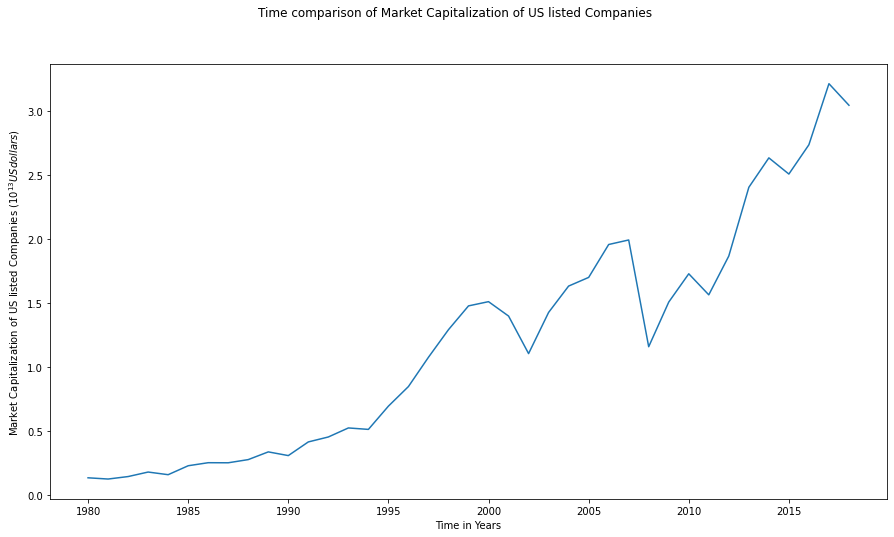

In [72]:
plt.figure(figsize=(15,8))
plt.plot(mkt_cap['MktCap']/(10**13))
plt.xlabel('Time in Years')
plt.ylabel(r'Market Capitalization of US listed Companies ($10^{13} US dollars$)')
plt.suptitle('Time comparison of Market Capitalization of US listed Companies')
plt.show()

## Get Money Data

In [109]:
m2_data = pd.read_csv('data/M2_money_stock.csv', index_col = 0)
m1_data = pd.read_csv('data/M1_money_stock.csv', index_col = 0)
m0_data = pd.read_csv('data/monetary_base_curr_in_circulation.csv', index_col = 0)
gdp_data = pd.read_csv('data/GDP.csv', index_col = 0)

In [110]:
m2_data.index = pd.to_datetime(m2_data.index)
m2_data.columns = ['M2']
# m2_data = m2_data.resample('Y').mean().loc[:'2018']

In [111]:
m1_data.index = pd.to_datetime(m1_data.index)
m1_data.columns = ['M1']
# m1_data = m1_data.resample('Y').mean().loc[:'2018']

In [112]:
m0_data.index = pd.to_datetime(m0_data.index)
m0_data.columns = ['M0']
# m0_data = m0_data.resample('Y').mean().loc[:'2018']

In [113]:
gdp_data.index = pd.to_datetime(gdp_data.index)
gdp_data.columns = ['GDP']
# gdp_data = gdp_data.resample('Y').mean().loc[:'2018']

## Differentiating Data for stationarity

In [114]:
# MktCap test
p_value = adfuller(mkt_cap.values)[1]
print(p_value)

0.9953318299509404


5.36082125877159e-10
(38, 1)


<AxesSubplot:>

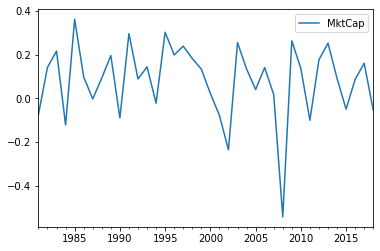

In [115]:
stationary_mkt_cap = (np.log(mkt_cap) - np.log(mkt_cap).shift(1)).dropna()
p_value = adfuller(stationary_mkt_cap.values)[1]
print(p_value)
print(stationary_mkt_cap.shape)
stationary_mkt_cap.plot()

In [144]:
# velocity  M1 test
p_value = adfuller(velocity_M1.values)[1]
print(p_value)

0.8937511457722445


4.4347028147672707e-23
(247, 1)


<AxesSubplot:xlabel='DATE'>

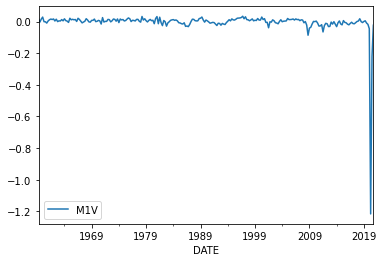

In [145]:
stationary_velocity_M1 = (np.log(velocity_M1) - np.log(velocity_M1).shift(1)).dropna()
p_value = adfuller(stationary_velocity_M1.values)[1]
print(p_value)
print(stationary_velocity_M1.shape)
stationary_velocity_M1.plot()

In [146]:
# MZMV Test
p_value = adfuller(velocity_MZM.values)[1]
print(p_value)

0.9260351279711372


1.654222601872268e-21
(247, 1)


<AxesSubplot:xlabel='DATE'>

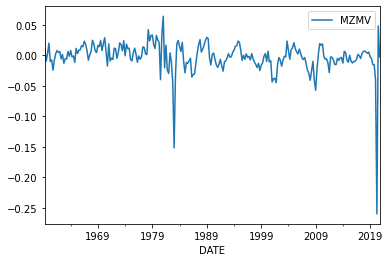

In [147]:
stationary_velocity_MZM = (np.log(velocity_MZM) - np.log(velocity_MZM).shift(1)).dropna()
p_value = adfuller(stationary_velocity_MZM.values)[1]
print(p_value)
print(stationary_velocity_MZM.shape)
stationary_velocity_MZM.plot()

In [148]:
# velocity  M2 test
p_value = adfuller(velocity_M2.values)[1]
print(p_value) 

0.9809877470330879


1.6131573177935524e-15
(247, 1)


<AxesSubplot:xlabel='DATE'>

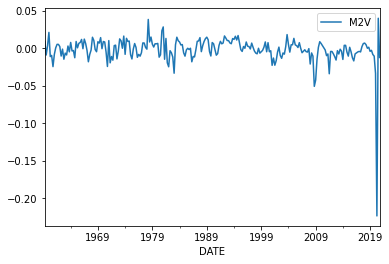

In [149]:
stationary_velocity_M2 = (np.log(velocity_M2) - np.log(velocity_M2).shift(1)).dropna()
p_value = adfuller(stationary_velocity_M2.values)[1]
print(p_value)
print(stationary_velocity_M2.shape)
stationary_velocity_M2.plot()

In [122]:
#  M0 test
p_value = adfuller(m0_data.values)[1]
print(p_value) 

1.0


6.259866709425103e-05
(745, 1)


<AxesSubplot:xlabel='DATE'>

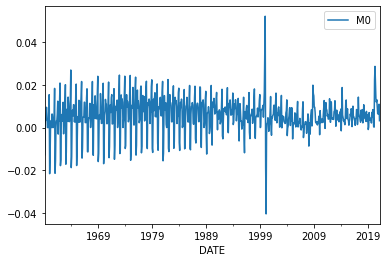

In [123]:
stationary_m0 = (np.log(m0_data) - np.log(m0_data.shift(1))).dropna()
p_value = adfuller(stationary_m0.values)[1]
print(p_value)
print(stationary_m0.shape)
stationary_m0.plot()

In [124]:
#  M1 test
p_value = adfuller(m1_data.values)[1]
print(p_value) 

0.9988524096486088


1.8019629011132474e-14
(2408, 1)


<AxesSubplot:xlabel='DATE'>

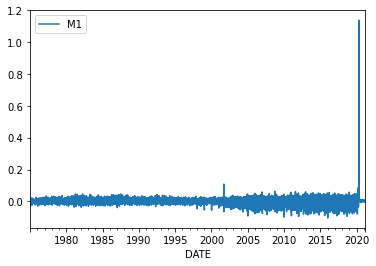

In [125]:
stationary_m1 = (np.log(m1_data) - np.log(m1_data).shift(1)).dropna()
p_value = adfuller(stationary_m1.values)[1]
print(p_value)
print(stationary_m1.shape)
stationary_m1.plot()

In [126]:
#  M2 test
p_value = adfuller(m2_data.values)[1]
print(p_value) 

1.0


8.398985931531416e-10
(2104, 1)


<AxesSubplot:xlabel='DATE'>

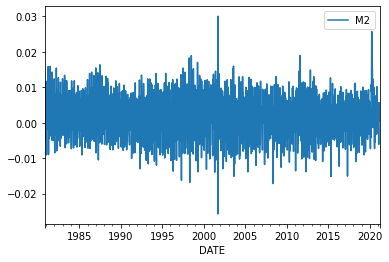

In [127]:
stationary_m2 = (np.log(m2_data) - np.log(m2_data.shift(1))).dropna()
p_value = adfuller(stationary_m2.values)[1]
print(p_value)
print(stationary_m2.shape)
stationary_m2.plot()

In [128]:
#  GDP test
p_value = adfuller(gdp_data.values)[1]
print(p_value)

1.0


2.611028960714281e-13
(295, 1)


<AxesSubplot:xlabel='DATE'>

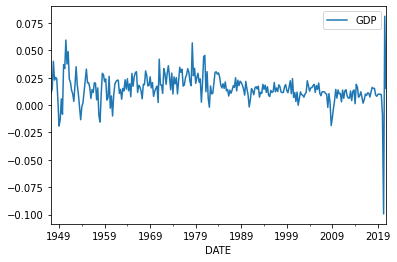

In [129]:
stationary_gdp = (np.log(gdp_data) - np.log(gdp_data.shift(1))).dropna()
p_value = adfuller(stationary_gdp.values)[1]
print(p_value)
print(stationary_gdp.shape)
stationary_gdp.plot()

In [208]:
#  inflation test
p_value = adfuller(inflation_data.values)[1]
print(p_value)

0.9989021312588977


0.0003003495031102378
(890, 1)


<AxesSubplot:xlabel='DATE'>

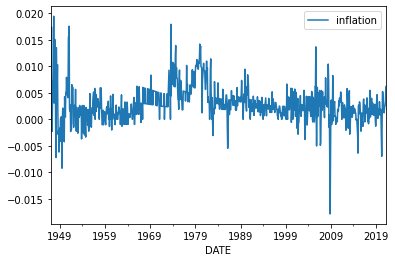

In [209]:
stationary_inflation_data = (np.log(inflation_data) - np.log(inflation_data.shift(1))).dropna()
p_value = adfuller(stationary_inflation_data.values)[1]
print(p_value)
print(stationary_inflation_data.shape)
stationary_inflation_data.plot()

In [130]:
#  MktCap Wilshire test
p_value = adfuller(mkt_cap_wilshire.values)[1]
print(p_value)

0.9989498961878838


1.4623821885246671e-28
(452, 1)


<AxesSubplot:xlabel='DATE'>

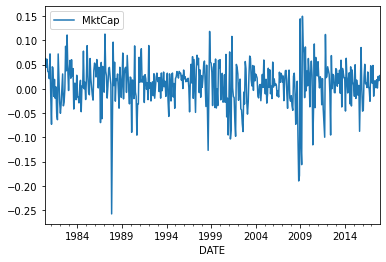

In [131]:
stationary_mkt_cap_wilshire = (np.log(mkt_cap_wilshire) - np.log(mkt_cap_wilshire.shift(1))).dropna()
p_value = adfuller(stationary_mkt_cap_wilshire.values)[1]
print(p_value)
print(stationary_mkt_cap_wilshire.shape)
stationary_mkt_cap_wilshire.plot()

## Defining Test Data

### M1

In [132]:
M1V_test_data = stationary_velocity_M1.join(stationary_mkt_cap, how = 'outer')
M1V_test_data = M1V_test_data.join(stationary_m2)
M1V_test_data = M1V_test_data.join(stationary_m1)
M1V_test_data = M1V_test_data.join(stationary_m0)
M1V_test_data = M1V_test_data.join(stationary_gdp)

M1V_test_data['MktCap'] = M1V_test_data['MktCap'].fillna(method = 'ffill')
M1V_test_data.dropna(inplace=True)

M1V_test_data = (M1V_test_data - M1V_test_data.mean())/M1V_test_data.std()
M1V_test_data.head(3)

,M1V,MktCap,M2,M1,M0,GDP


In [218]:
M1V_test_data_ws = stationary_velocity_M1.join(stationary_mkt_cap_wilshire, how = 'outer')
M1V_test_data_ws['M1V'] = M1V_test_data_ws['M1V'].fillna(method = 'ffill')
M1V_test_data_ws.dropna(inplace=True)

M1V_test_data_ws = M1V_test_data_ws.join(stationary_m2, how = 'outer')
M1V_test_data_ws['M2'] = M1V_test_data_ws['M2'].fillna(method = 'ffill')
M1V_test_data_ws.dropna(inplace=True)

M1V_test_data_ws = M1V_test_data_ws.join(stationary_m1)
M1V_test_data_ws['M1'] = M1V_test_data_ws['M1'].fillna(method = 'ffill')
M1V_test_data_ws.dropna(inplace=True)

M1V_test_data_ws = M1V_test_data_ws.join(stationary_m0, how = 'outer')
M1V_test_data_ws['M0'] = M1V_test_data_ws['M0'].fillna(method = 'bfill')
M1V_test_data_ws.dropna(inplace=True)

M1V_test_data_ws = M1V_test_data_ws.join(stationary_gdp, how = 'outer')
M1V_test_data_ws['GDP'] = M1V_test_data_ws['GDP'].fillna(method = 'ffill')
M1V_test_data_ws.dropna(inplace=True)

M1V_test_data_ws = M1V_test_data_ws.join(stationary_inflation_data, how = 'outer')
M1V_test_data_ws['inflation'] = M1V_test_data_ws['inflation'].fillna(method = 'bfill')
M1V_test_data_ws.dropna(inplace=True)

M1V_test_data_ws = (M1V_test_data_ws - M1V_test_data_ws.mean())/M1V_test_data_ws.std()
M1V_test_data_ws.head(3)

,M1V,MktCap,M2,M1,M0,GDP,inflation
DATE,,,,,,,
1981-08-31,1.65585,-0.108417,1.209861,-0.822452,-0.810520,2.520147,2.856269
1981-09-30,1.65585,-1.337302,-0.299306,-0.822452,-0.706579,2.520147,0.363131
1981-10-31,-0.21063,-1.591716,-0.323895,-0.822452,1.252769,-0.896319,0.768498


### M2

In [124]:
M2V_test_data = stationary_velocity_M2.join(stationary_mkt_cap, how = 'outer')
M2V_test_data = M2V_test_data.join(stationary_m2)
M2V_test_data = M2V_test_data.join(stationary_m1)
M2V_test_data = M2V_test_data.join(stationary_m0)
M2V_test_data = M2V_test_data.join(stationary_gdp)

M2V_test_data['MktCap'] = M2V_test_data['MktCap'].fillna(method = 'ffill')
M2V_test_data.dropna(inplace=True)
M2V_test_data = (M2V_test_data - M2V_test_data.mean())/M2V_test_data.std()
M2V_test_data.head(3)

,M2V,MktCap,M2,M1,M0,GDP
1981-12-31,1.144711,-0.906284,-0.441278,0.260683,0.403924,2.774908
1982-12-31,-1.236947,0.353615,1.292656,0.111430,0.145581,-0.447864
1983-12-31,-0.840952,0.786628,2.565725,0.986362,0.992024,1.365820


In [220]:
M2V_test_data_ws = stationary_velocity_M2.join(stationary_mkt_cap_wilshire, how = 'outer')
M2V_test_data_ws['M2V'] = M2V_test_data_ws['M2V'].fillna(method = 'ffill')
M1V_test_data_ws.dropna(inplace=True)

M2V_test_data_ws = M2V_test_data_ws.join(stationary_m2, how = 'outer')
M2V_test_data_ws['M2'] = M2V_test_data_ws['M2'].fillna(method = 'ffill')
M2V_test_data_ws.dropna(inplace=True)

M2V_test_data_ws = M2V_test_data_ws.join(stationary_m1)
M2V_test_data_ws['M1'] = M2V_test_data_ws['M1'].fillna(method = 'ffill')
M2V_test_data_ws.dropna(inplace=True)

M2V_test_data_ws = M2V_test_data_ws.join(stationary_m0, how = 'outer')
M2V_test_data_ws['M0'] = M2V_test_data_ws['M0'].fillna(method = 'bfill')
M2V_test_data_ws.dropna(inplace=True)

M2V_test_data_ws = M2V_test_data_ws.join(stationary_gdp, how = 'outer')
M2V_test_data_ws['GDP'] = M2V_test_data_ws['GDP'].fillna(method = 'ffill')
M2V_test_data_ws.dropna(inplace=True)

M2V_test_data_ws = M2V_test_data_ws.join(stationary_inflation_data, how = 'outer')
M2V_test_data_ws['inflation'] = M2V_test_data_ws['inflation'].fillna(method = 'bfill')
M2V_test_data_ws.dropna(inplace=True)

M2V_test_data_ws = (M2V_test_data_ws - M2V_test_data_ws.mean())/M2V_test_data_ws.std()
M2V_test_data_ws.head(3)

,M2V,MktCap,M2,M1,M0,GDP,inflation
DATE,,,,,,,
1981-08-31,1.355206,-0.108417,1.209861,-0.822452,-0.810520,2.520147,2.856269
1981-09-30,1.355206,-1.337302,-0.299306,-0.822452,-0.706579,2.520147,0.363131
1981-10-31,-1.582006,-1.591716,-0.323895,-0.822452,1.252769,-0.896319,0.768498


### MZM

In [125]:
MZMV_test_data = stationary_velocity_MZM.join(stationary_mkt_cap, how = 'outer')
MZMV_test_data = MZMV_test_data.join(stationary_m2)
MZMV_test_data = MZMV_test_data.join(stationary_m1)
MZMV_test_data = MZMV_test_data.join(stationary_m0)
MZMV_test_data = MZMV_test_data.join(stationary_gdp)

MZMV_test_data['MktCap'] = MZMV_test_data['MktCap'].fillna(method = 'ffill')
MZMV_test_data.dropna(inplace=True)
MZMV_test_data = (MZMV_test_data - MZMV_test_data.mean())/MZMV_test_data.std()
MZMV_test_data.head(3)

,MZMV,MktCap,M2,M1,M0,GDP
1981-12-31,1.484183,-0.906284,-0.441278,0.260683,0.403924,2.774908
1982-12-31,-0.612524,0.353615,1.292656,0.111430,0.145581,-0.447864
1983-12-31,-3.084478,0.786628,2.565725,0.986362,0.992024,1.365820


# Analysis

## M1 Velocity

Linear Regression

In [126]:
# Regression M1 velocity and Mkt Cap 
x = np.array(M1V_test_data['MktCap'].values).reshape(1,-1)[0]
y = np.array(M1V_test_data['M1V'].values).reshape(1,-1)[0]

slope, intercept, r_value, p_value, std_err = linregress(x.astype(float),y)
print('slope:', slope, 'p_value:', p_value)

slope: -0.0003882485001424527 p_value: 0.9981541977070232


## M2 Velocity

### Simple Regression

In [127]:
# Regression M2 velocity and Mkt Cap 
x = np.array(M2V_test_data['MktCap'].values).reshape(1,-1)[0]
y = np.array(M2V_test_data['M2V'].values).reshape(1,-1)[0]

slope, intercept, r_value, p_value, std_err = linregress(x.astype(float),y)
print('slope:', slope, 'p_value:', p_value)

slope: 0.061403590029207096 p_value: 0.7142019374308054


### Multiple Regression

### Velocity ~ M0, M1 and GDP

In [128]:
model = ols("M2V ~ M0 + M1 + GDP", M2V_test_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    M2V   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     11.82
Date:                Sun, 09 May 2021   Prob (F-statistic):           1.86e-05
Time:                        21:36:04   Log-Likelihood:                -39.843
No. Observations:                  38   AIC:                             87.69
Df Residuals:                      34   BIC:                             94.24
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.643e-17      0.118  -3.08e-16      1.000      -0.241       0.241
M0             0.0845      0.138      0.612      0.544      -0.196       0.365
M1            -0.2454      0.140     -1.753      0.089      -0.530       0.039
GDP            0.6234      0.126      4.953      0.000       0.368       0.879
==============================================================================
Omnibus:                        3.537   Durbin-Watson:                   0.709
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                2.402
Skew:                           0.584   Prob(JB):                        0.301
Kurtosis:                       3.393   Cond. No.                         1.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Velocity ~ M0, GDP and Fin Mkt

In [129]:
model = ols("M2V ~ M0 + MktCap", M2V_test_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    M2V   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                   0.08430
Date:                Sun, 09 May 2021   Prob (F-statistic):              0.919
Time:                        21:36:04   Log-Likelihood:                -53.322
No. Observations:                  38   AIC:                             112.6
Df Residuals:                      35   BIC:                             117.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.643e-17      0.166  -2.19e-16      1.000      -0.338       0.338
M0             0.0326      0.172      0.190      0.851      -0.317       0.382
MktCap         0.0550      0.172      0.320      0.751      -0.294       0.404
==============================================================================
Omnibus:                        2.592   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.274   Jarque-Bera (JB):                1.616
Skew:                          -0.478   Prob(JB):                        0.446
Kurtosis:                       3.326   Cond. No.                         1.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Velocity ~ M2 GDP and MktCap

In [130]:
model = ols("M2V ~ M2 + GDP + MktCap", M2V_test_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    M2V   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     347.5
Date:                Sun, 09 May 2021   Prob (F-statistic):           1.45e-25
Time:                        21:36:04   Log-Likelihood:                 12.236
No. Observations:                  38   AIC:                            -16.47
Df Residuals:                      34   BIC:                            -9.921
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.643e-17      0.030  -1.21e-15      1.000      -0.061       0.061
M2            -0.7091      0.031    -23.218      0.000      -0.771      -0.647
GDP            0.6426      0.031     21.052      0.000       0.581       0.705
MktCap         0.0272      0.030      0.892      0.379      -0.035       0.089
==============================================================================
Omnibus:                       63.506   Durbin-Watson:                   1.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              607.219
Skew:                          -3.836   Prob(JB):                    1.39e-132
Kurtosis:                      21.018   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Granger Causality Test

In [173]:
data = M2V_test_data_ws[['M2V', 'MktCap']]
data.head(3)

,M2V,MktCap
DATE,,
1981-08-31,1.355206,-0.108417
1981-09-30,1.355206,-1.337302
1981-10-31,-1.582006,-1.591716


In [174]:
gc_res = grangercausalitytests(data, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5790  , p=0.1090  , df_denom=433, df_num=1
ssr based chi2 test:   chi2=2.5968  , p=0.1071  , df=1
likelihood ratio test: chi2=2.5891  , p=0.1076  , df=1
parameter F test:         F=2.5790  , p=0.1090  , df_denom=433, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3712  , p=0.2549  , df_denom=430, df_num=2
ssr based chi2 test:   chi2=2.7742  , p=0.2498  , df=2
likelihood ratio test: chi2=2.7654  , p=0.2509  , df=2
parameter F test:         F=1.3712  , p=0.2549  , df_denom=430, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.5924  , p=0.0523  , df_denom=427, df_num=3
ssr based chi2 test:   chi2=7.9046  , p=0.0480  , df=3
likelihood ratio test: chi2=7.8335  , p=0.0496  , df=3
parameter F test:         F=2.5924  , p=0.0523  , df_denom=427, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.1182  , p=0.0777  

### Granger Causality:
MktCap (Financial Markets) granger causes M2 velocity

In [106]:
data_inv = M2V_test_data_ws[['MktCap', 'M2V']]
gc_res = grangercausalitytests(data_inv, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1761  , p=0.6774  , df_denom=34, df_num=1
ssr based chi2 test:   chi2=0.1916  , p=0.6616  , df=1
likelihood ratio test: chi2=0.1911  , p=0.6620  , df=1
parameter F test:         F=0.1761  , p=0.6774  , df_denom=34, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5258  , p=0.5962  , df_denom=31, df_num=2
ssr based chi2 test:   chi2=1.2213  , p=0.5430  , df=2
likelihood ratio test: chi2=1.2010  , p=0.5485  , df=2
parameter F test:         F=0.5258  , p=0.5962  , df_denom=31, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6904  , p=0.5655  , df_denom=28, df_num=3
ssr based chi2 test:   chi2=2.5891  , p=0.4594  , df=3
likelihood ratio test: chi2=2.4979  , p=0.4757  , df=3
parameter F test:         F=0.6904  , p=0.5655  , df_denom=28, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3633  , p=0.8324  , df_d

In [179]:
data = M1V_test_data_ws[['MktCap', 'M1V']]
gc_res = grangercausalitytests(data, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2516  , p=0.2639  , df_denom=433, df_num=1
ssr based chi2 test:   chi2=1.2603  , p=0.2616  , df=1
likelihood ratio test: chi2=1.2585  , p=0.2619  , df=1
parameter F test:         F=1.2516  , p=0.2639  , df_denom=433, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3747  , p=0.2540  , df_denom=430, df_num=2
ssr based chi2 test:   chi2=2.7815  , p=0.2489  , df=2
likelihood ratio test: chi2=2.7726  , p=0.2500  , df=2
parameter F test:         F=1.3747  , p=0.2540  , df_denom=430, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2603  , p=0.2875  , df_denom=427, df_num=3
ssr based chi2 test:   chi2=3.8430  , p=0.2789  , df=3
likelihood ratio test: chi2=3.8261  , p=0.2809  , df=3
parameter F test:         F=1.2603  , p=0.2875  , df_denom=427, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5351  , p=0.1910  

### Granger Causality:
No evidence that M2V causes MktCap (Fin Mkts)

## MZM Velocity

In [134]:
# Regression MZM velocity and Mkt Cap 

x = np.array(MZMV_test_data['MktCap'].values).reshape(1,-1)[0]
y = np.array(MZMV_test_data['MZMV'].values).reshape(1,-1)[0]

slope, intercept, r_value, p_value, std_err = linregress(x.astype(float),y)
print('slope:', slope, 'p_value:', p_value)

slope: 0.08414396738019041 p_value: 0.6154822768432137


## Velocity ~ M0, M1, M2 and GDP

In [135]:
model = ols("MZMV ~ M0 + M1 + M2 + GDP", MZMV_test_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MZMV   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     12.46
Date:                Sun, 09 May 2021   Prob (F-statistic):           2.78e-06
Time:                        21:36:04   Log-Likelihood:                -35.928
No. Observations:                  38   AIC:                             81.86
Df Residuals:                      33   BIC:                             90.04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.898e-17      0.108   5.44e-16      1.000      -0.221       0.221
M0            -0.0919      0.127     -0.724      0.474      -0.350       0.166
M1            -0.0501      0.132     -0.378      0.708      -0.319       0.219
M2            -0.6081      0.114     -5.347      0.000      -0.839      -0.377
GDP            0.4133      0.115      3.586      0.001       0.179       0.648
==============================================================================
Omnibus:                       13.446   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.079
Skew:                          -1.217   Prob(JB):                     0.000877
Kurtosis:                       4.721   Cond. No.                         1.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Velocity ~ MktCap, M0 and GDP

In [136]:
model = ols("MZMV ~ M0 + GDP + MktCap", MZMV_test_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MZMV   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     3.383
Date:                Sun, 09 May 2021   Prob (F-statistic):             0.0292
Time:                        21:36:04   Log-Likelihood:                -48.450
No. Observations:                  38   AIC:                             104.9
Df Residuals:                      34   BIC:                             111.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.898e-17      0.149   3.97e-16      1.000      -0.302       0.302
M0            -0.1607      0.154     -1.041      0.305      -0.475       0.153
GDP            0.4627      0.151      3.055      0.004       0.155       0.770
MktCap         0.1085      0.154      0.707      0.485      -0.203       0.420
==============================================================================
Omnibus:                       29.065   Durbin-Watson:                   1.513
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.551
Skew:                          -1.775   Prob(JB):                     3.93e-17
Kurtosis:                       8.926   Cond. No.                         1.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Velocity ~ M0, M1, M2, GDP and MktCap

In [137]:
model = ols("MZMV ~ M2 + GDP + MktCap", MZMV_test_data).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MZMV   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     16.30
Date:                Sun, 09 May 2021   Prob (F-statistic):           9.76e-07
Time:                        21:36:04   Log-Likelihood:                -36.476
No. Observations:                  38   AIC:                             80.95
Df Residuals:                      34   BIC:                             87.50
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.898e-17      0.108   5.44e-16      1.000      -0.220       0.220
M2            -0.6214      0.110     -5.647      0.000      -0.845      -0.398
GDP            0.4116      0.110      3.741      0.001       0.188       0.635
MktCap         0.0566      0.110      0.515      0.610      -0.167       0.280
==============================================================================
Omnibus:                       18.761   Durbin-Watson:                   1.534
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.541
Skew:                          -1.485   Prob(JB):                     4.69e-06
Kurtosis:                       5.585   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Granger Causality Test

In [138]:
data = MZMV_test_data[['MZMV', 'MktCap']]
gc_res = grangercausalitytests(data, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9328  , p=0.1735  , df_denom=34, df_num=1
ssr based chi2 test:   chi2=2.1033  , p=0.1470  , df=1
likelihood ratio test: chi2=2.0457  , p=0.1526  , df=1
parameter F test:         F=1.9328  , p=0.1735  , df_denom=34, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4056  , p=0.2604  , df_denom=31, df_num=2
ssr based chi2 test:   chi2=3.2646  , p=0.1955  , df=2
likelihood ratio test: chi2=3.1250  , p=0.2096  , df=2
parameter F test:         F=1.4056  , p=0.2604  , df_denom=31, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2961  , p=0.2952  , df_denom=28, df_num=3
ssr based chi2 test:   chi2=4.8602  , p=0.1823  , df=3
likelihood ratio test: chi2=4.5511  , p=0.2078  , df=3
parameter F test:         F=1.2961  , p=0.2952  , df_denom=28, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8741  , p=0.4933  , df_d

## VAR Analysis

In [180]:
from statsmodels.tsa.api import VAR

### VAR ~ M1V, MktCap

In [204]:
model = VAR(M1V_test_data_ws[['M1V', 'MktCap']])
results = model.fit(4)
results.summary()

/home/felipe-fp/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 31, May, 2021
Time:                     12:22:33
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -1.44606
Nobs:                     433.000    HQIC:                  -1.54848
Log likelihood:          -861.092    FPE:                   0.198837
AIC:                     -1.61528    Det(Omega_mle):        0.190822
--------------------------------------------------------------------
Results for equation M1V
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.000486         0.021247           -0.023           0.982
L1.M1V            0.947156         0.047769           19.828           0.000
L1.MktCap         0.010142         0.021587            0.470           0.638
L

$M1V_t = 0.749*M1V_{t-1} + 0.335*MktCap_{t-1}$

### VAR ~ M1V, MktCap, M2

In [182]:
model = VAR(M1V_test_data_ws[['M1V', 'MktCap', 'M2']])
results = model.fit(4)
results.summary()

/home/felipe-fp/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 31, May, 2021
Time:                     11:52:52
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -1.33144
Nobs:                     433.000    HQIC:                  -1.55335
Log likelihood:          -1436.57    FPE:                   0.183043
AIC:                     -1.69809    Det(Omega_mle):        0.167499
--------------------------------------------------------------------
Results for equation M1V
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.000827         0.021296           -0.039           0.969
L1.M1V            0.940747         0.048090           19.562           0.000
L1.MktCap         0.012494         0.021743            0.575           0.566
L

$M1V_t = 0.925*M1V_{t-1} + 0.385*MktCap_{t-1} + 0.443*M2_{t-1}$

### VAR ~ M1V, M2, GDP, MktCap

In [183]:
model = VAR(M1V_test_data_ws[['M1V', 'MktCap', 'M2', 'GDP']])
results = model.fit(4)
results.summary()

/home/felipe-fp/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 31, May, 2021
Time:                     11:53:15
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -2.89808
Nobs:                     433.000    HQIC:                  -3.28500
Log likelihood:          -1623.76    FPE:                  0.0290947
AIC:                     -3.53736    Det(Omega_mle):       0.0249411
--------------------------------------------------------------------
Results for equation M1V
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.000932         0.021358           -0.044           0.965
L1.M1V            0.943982         0.060958           15.486           0.000
L1.MktCap         0.011826         0.021928            0.539           0.590
L

$M1V_t = 0.778*M1V_{t-1} + 0.396*MktCap_{t-1}$

### VAR ~ M1V, M2, M1, M0, GDP, MktCap

In [184]:
model = VAR(M1V_test_data_ws)
results = model.fit(4)
results.summary()

/home/felipe-fp/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 31, May, 2021
Time:                     11:53:33
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -5.22175
Nobs:                     433.000    HQIC:                  -6.07526
Log likelihood:          -2100.59    FPE:                 0.00131862
AIC:                     -6.63194    Det(Omega_mle):     0.000941574
--------------------------------------------------------------------
Results for equation M1V
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.001464         0.021394           -0.068           0.945
L1.M1V            0.930138         0.062131           14.970           0.000
L1.MktCap         0.009262         0.022134            0.418           0.676
L

$M1V_t = -51.13*M1V_{t-1} + 0.28*MktCap_{t-1} + 1.15*M2_{t-1} - 42.75*M1_{t-1} + 21*GDP_{t-1} -71.35*M1V_{t-2} -0.443*MktCap_{t-2} - 58.67*M1_{t-2} + 28.77*GDP_{t-2}$

### VAR ~ M2V, MktCap

In [189]:
model = VAR(M2V_test_data_ws[['M2V', 'MktCap']])
results = model.fit(4)
results.summary()

/home/felipe-fp/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 31, May, 2021
Time:                     11:54:35
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -1.21137
Nobs:                     433.000    HQIC:                  -1.31379
Log likelihood:          -911.902    FPE:                   0.251432
AIC:                     -1.38059    Det(Omega_mle):        0.241297
--------------------------------------------------------------------
Results for equation M2V
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.004002         0.024019            0.167           0.868
L1.M2V            0.916638         0.048485           18.906           0.000
L1.MktCap         0.034970         0.024563            1.424           0.155
L

$M2V_t = 0.598*M2V_{t-1} + 0.409*MktCap_{t-1}$

### VAR ~ M2V, M2, MktCap

In [190]:
model = VAR(M2V_test_data_ws[['M2V', 'M2', 'MktCap']])
results = model.fit(4)
results.summary()

/home/felipe-fp/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 31, May, 2021
Time:                     11:54:50
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -1.12673
Nobs:                     433.000    HQIC:                  -1.34864
Log likelihood:          -1480.89    FPE:                   0.224625
AIC:                     -1.49338    Det(Omega_mle):        0.205550
--------------------------------------------------------------------
Results for equation M2V
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.003701         0.024010            0.154           0.877
L1.M2V            0.906206         0.049124           18.447           0.000
L1.M2            -0.033467         0.026126           -1.281           0.200
L

$M2V_t = 0.739*M2V_{t-1} + 0.488*MktCap_{t-1}$

### VAR ~ M2V, M2, GDP, MktCap

In [192]:
model = VAR(M2V_test_data_ws[['M2V', 'M2', 'GDP', 'MktCap']])
results = model.fit(4)
results.summary()
# irf = results.irf(2)
# irf.plot_cum_effects(orth=False, impulse='MktCap')

/home/felipe-fp/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 31, May, 2021
Time:                     11:55:29
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -2.99377
Nobs:                     433.000    HQIC:                  -3.38069
Log likelihood:          -1603.05    FPE:                  0.0264396
AIC:                     -3.63305    Det(Omega_mle):       0.0226651
--------------------------------------------------------------------
Results for equation M2V
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.004222         0.023952            0.176           0.860
L1.M2V            0.904472         0.067809           13.339           0.000
L1.M2            -0.039181         0.026339           -1.488           0.137
L

$M2V_t = 32.71*M2V_{t-3} + 23.55*M2_{t-3} -23.79*GDP_{t-3}$

### VAR ~ M2V, M2, M1, M0, GDP, Mkt Cap

In [205]:
model = VAR(M2V_test_data_ws[['M2V', 'M2','M1', 'GDP', 'MktCap']])
results = model.fit(4)
results.summary()

/home/felipe-fp/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 31, May, 2021
Time:                     13:03:12
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -5.25868
Nobs:                     433.000    HQIC:                  -5.85613
Log likelihood:          -1614.78    FPE:                 0.00193929
AIC:                     -6.24581    Det(Omega_mle):      0.00153040
--------------------------------------------------------------------
Results for equation M2V
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.004369         0.023991            0.182           0.855
L1.M2V            0.911954         0.068663           13.282           0.000
L1.M2            -0.038337         0.027037           -1.418           0.156
L

In [221]:
model = VAR(M2V_test_data_ws[['M2V', 'M2','M1', 'GDP','inflation', 'MktCap']])
results = model.fit(4)
results.summary()

/home/felipe-fp/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 31, May, 2021
Time:                     13:23:15
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -5.11518
Nobs:                     433.000    HQIC:                  -5.96868
Log likelihood:          -2123.66    FPE:                 0.00146692
AIC:                     -6.52536    Det(Omega_mle):      0.00104747
--------------------------------------------------------------------
Results for equation M2V
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.005317         0.023821            0.223           0.823
L1.M2V               0.884781         0.069555           12.721           0.000
L1.M2               -0.045506         0.027308           -1.666   

$M2V_t = 0.394*MktCap_{t-1} + 0.366*M0_{t-1}$

In [222]:
model = VAR(M2V_test_data_ws[['M2V', 'M2','M1', 'GDP','inflation']])
results = model.fit(4)
results.summary()

/home/felipe-fp/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 31, May, 2021
Time:                     13:49:06
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -5.56351
Nobs:                     433.000    HQIC:                  -6.16097
Log likelihood:          -1548.79    FPE:                 0.00142974
AIC:                     -6.55064    Det(Omega_mle):      0.00112828
--------------------------------------------------------------------
Results for equation M2V
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.005778         0.023984            0.241           0.810
L1.M2V               0.885439         0.069926           12.662           0.000
L1.M2               -0.047872         0.027328           -1.752   

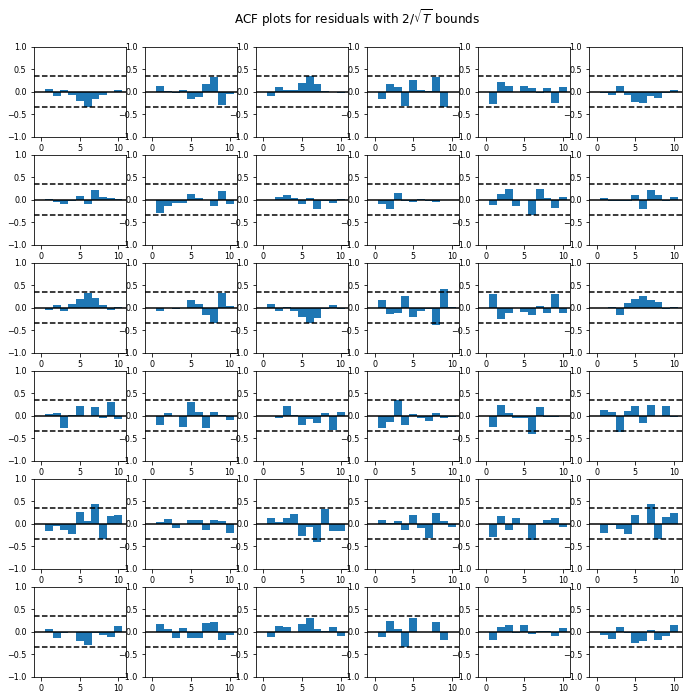

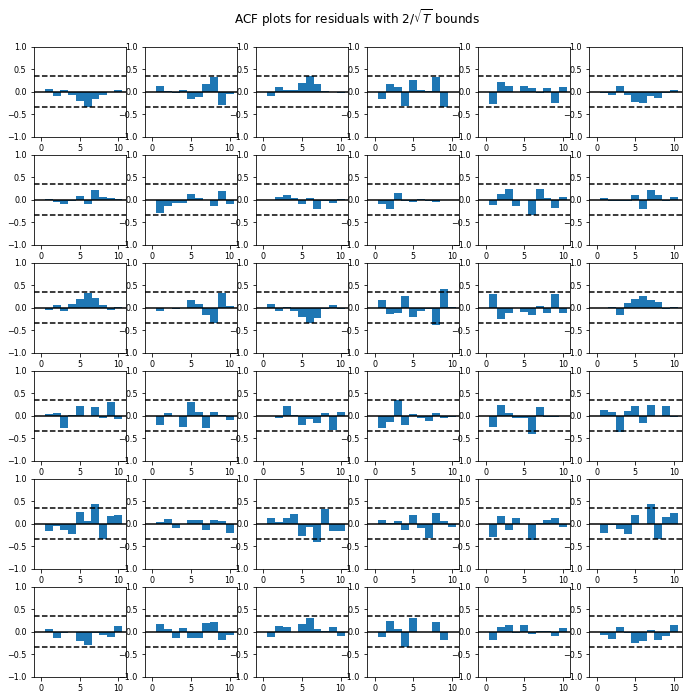

In [54]:
results.plot_acorr()